In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor

In [37]:
df = pd.read_excel('StockX.xlsx')
df.drop(['Tên giày'], axis = 1, inplace = True)


Accuracy for SVM: 0.058823529411764705


ValueError: X has 2 features, but SVC is expecting 10 features as input.

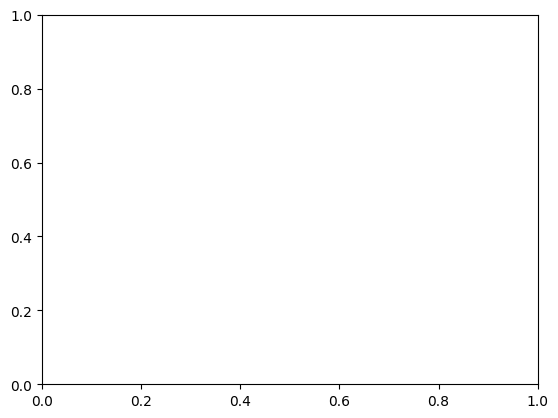

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import DecisionBoundaryDisplay

# Đọc dữ liệu từ tập tin Excel
df = pd.read_excel('StockX.xlsx')

# Loại bỏ cột 'Tên giày'
df.drop(['Tên giày'], axis=1, inplace=True)

# Chọn các cột đặc trưng và nhãn
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Thay đổi chuỗi rỗng thành NaN
X_train[X_train == ''] = np.nan
X_test[X_test == ''] = np.nan

# Chuyển đổi cột sang dạng số
X_train = pd.to_numeric(X_train.flatten(), errors='coerce').reshape(X_train.shape)
X_test = pd.to_numeric(X_test.flatten(), errors='coerce').reshape(X_test.shape)

# Loại bỏ các dòng chứa giá trị NaN
nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

X_train = X_train[~nan_rows_train]
X_test = X_test[~nan_rows_test]
y_train = y_train[~nan_rows_train]
y_test = y_test[~nan_rows_test]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sử dụng SVM
svm_clf = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào loại dữ liệu
svm_clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_clf.predict(X_test)

# Đánh giá độ chính xác
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm}")

# Vẽ biên quyết định của SVM trên tập dữ liệu 2D
titles = ["SVM with linear kernel"]

fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip([svm_clf], titles, [sub]):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train[:, :2],  # Chỉ sử dụng 2 cột đầu tiên
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
